In [79]:
import numpy as np
import matplotlib.pyplot as plt

400


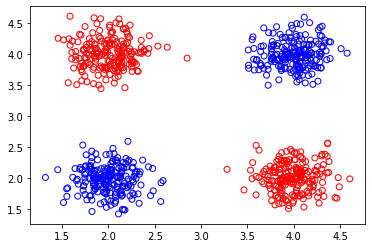

In [80]:
N = 0
Npoints = 200

mhix1 = 2
mhiy1 = 2
sigma1 = 0.05

mhix2 = 2
mhiy2 = 4
sigma2 = 0.05

mhix3 = 4
mhiy3 = 4
sigma3 = 0.05

mhix4 = 4
mhiy4 = 2
sigma4 = 0.05

mean1 = [mhix1, mhiy1]
cov1 = [[sigma1, 0], [0, sigma1]]
x1G1, y1G1 = np.random.multivariate_normal(mean1, cov1, Npoints).T

mean2 = [mhix2, mhiy2]
cov2 = [[sigma2, 0], [0, sigma2]]
x2G1, y2G1 = np.random.multivariate_normal(mean2, cov2, Npoints).T

mean3 = [mhix3, mhiy3]
cov3 = [[sigma3, 0], [0, sigma3]]
x1G2, y1G2 = np.random.multivariate_normal(mean3, cov3, Npoints).T

mean4 = [mhix4, mhiy4]
cov4 = [[sigma4, 0], [0, sigma4]]
x2G2, y2G2 = np.random.multivariate_normal(mean4, cov4, Npoints).T

x1 = np.concatenate((x1G1, x1G2), axis = 0)
y1 = np.concatenate((y1G1, y1G2), axis = 0)
x2 = np.concatenate((x2G1, x2G2), axis = 0)
y2 = np.concatenate((y2G1, y2G2), axis = 0)

N = x1.shape[0]
print(N)

plt.scatter(x1, y1, color='b', facecolor='none')
plt.scatter(x2, y2, color='r', facecolor='none')
plt.show()


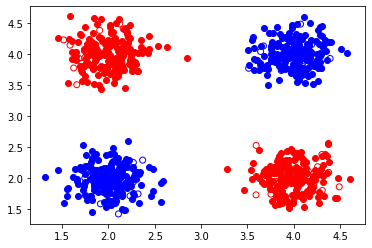

In [81]:
trainSize = int(90/100 * N)
testSize = N - trainSize
trainIndex = np.random.choice(np.arange(N), trainSize, replace=False)
trainIndex = np.sort(trainIndex)
testIndex = np.delete(np.arange(N), trainIndex)

x1_train = x1[trainIndex]
x1_train = np.resize(x1_train, (trainSize, 1))
x2_train = x2[trainIndex]
x2_train = np.resize(x2_train, (trainSize, 1))
y1_train = y1[trainIndex]
y1_train = np.resize(y1_train, (trainSize, 1))
y2_train = y2[trainIndex]
y2_train = np.resize(y2_train, (trainSize, 1))

x1_test = x1[testIndex]
x1_test = np.resize(x1_test, (testSize, 1))
x2_test = x2[testIndex]
x2_test = np.resize(x2_test, (testSize, 1))
y1_test = y1[testIndex]
y1_test = np.resize(y1_test, (testSize, 1))
y2_test = y2[testIndex]
y2_test = np.resize(y2_test, (testSize, 1))

classTrain_1 = -1*np.ones((trainSize, 1))
classTrain_2 = np.ones((trainSize, 1))

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')

plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.show()

xin_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_1_2 = np.concatenate((xin_1, xin_2), axis = 0)
bias = np.ones((xin_1_2.shape[0], 1))
xin = np.concatenate((xin_1_2, bias), axis = 1)

actualTest = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test1 = np.concatenate((x1_test, y1_test), axis = 1)
test2 = np.concatenate((x2_test, y2_test), axis = 1)
testRange = np.concatenate((test1, test2), axis = 0)
testRange = np.concatenate((testRange, np.ones((testRange.shape[0], 1))), axis = 1)

classTrain = np.concatenate((classTrain_1, classTrain_2), axis = 0)


In [82]:
def trainELMPseudoInverse(x, y, p):
    n = np.shape(x)[1]
    z = np.random.rand(n, p) - 0.5
    z = np.resize(z, (z.shape[0], z.shape[1]))

    for _ in range(maxEpocas):
        h = np.tanh(np.dot(x, z))
        w = np.dot(np.linalg.pinv(h), y)

    return z,w

def yELM(z, w, test):
    w = np.resize(w, (w.shape[0], 1))
    classified_H = np.tanh(np.dot(test, z))
    classified = np.sign(np.tanh(np.dot(classified_H, w)))
    return classified

In [83]:
maxEpocas = 10
p = 10
z, wt = trainELMPseudoInverse(xin, classTrain, p)
print("z:\n" + str(z))
print("Pesos:\n" + str(wt))

z:
[[-0.21310654 -0.36261645  0.35759216 -0.28254262  0.44431137 -0.35908354
   0.0672486  -0.21468444 -0.32778303  0.17777688]
 [-0.27106464 -0.36174551 -0.24455223  0.35525437 -0.37338423  0.33774318
   0.46942448  0.0714173   0.16371741 -0.40343637]
 [ 0.27798964  0.42296211  0.17329832 -0.05098213 -0.33371063 -0.41255061
  -0.17170989 -0.216666   -0.1511174   0.25354415]]
Pesos:
[[  42.31455272]
 [ -13.96367915]
 [ -72.87325263]
 [ -12.38413277]
 [   9.7185975 ]
 [  13.78145285]
 [  27.91239835]
 [  49.19637827]
 [-117.64956592]
 [  -2.84644142]]


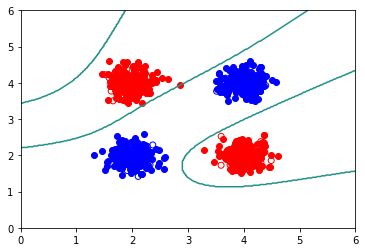

In [84]:
nx, ny = (6,6)
xgrid = np.linspace(0, nx, 300)
ygrid = np.linspace(0, ny, 300)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))
MC = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for j, yter in enumerate(ygrid):
  for i, xter in enumerate(xgrid):
    H = np.tanh(np.dot([xter,yter,1], z))
    xyClass = np.sign(np.tanh(np.dot(H, wt)))
    classMeshgrid[j,i] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()